# Markov Chain simulation on a sample student state space

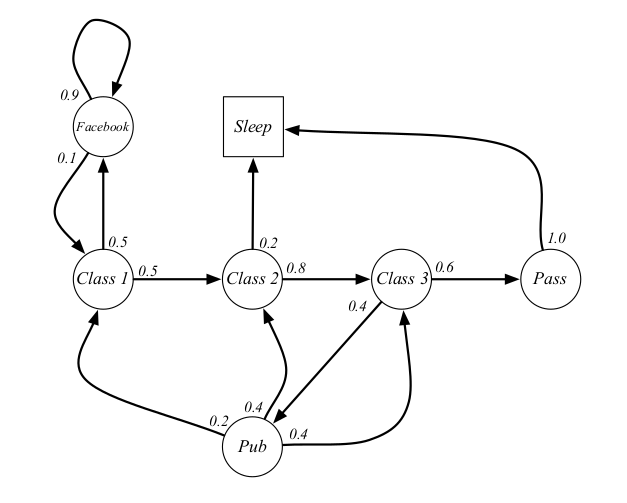

In [80]:
import numpy as np
import pandas as pd
import random
import math
from matplotlib import pyplot as plt
from statistics import mean 

class MarkovChain:
    def __init__(self):
        self.states=["c1","c2","c3","pass","pub","fb","sleep"]
        self.start=["c1"]
        self.terminal=["sleep"]
        self.current=random.choice(self.start)
        
        self.P=pd.DataFrame(
            np.array([[0,0.5,0,0,0,0.5,0],
                [0,0,0.8,0,0,0,0.2],
                [0,0,0,0.6,0.4,0,0],
                [0,0,0,0,0,0,1.0],
                [0.2,0.4,0.4,0,0,0,0],
                [0.1,0,0,0,0,0.9,0],
                [0,0,0,0,0,0,1.0]]),
            index=self.states, columns=self.states)
        
    def transition(self):              
        cdf = self.P.loc[self.current].cumsum()
        state = (cdf>=random.random()).idxmax()
        self.current=state       

    def reset(self):
        self.current=random.choice(self.start)  
        

## Sample Episodes for Student Markov Chain

In [81]:
print("Welcome To Student Markov Process Simulator!")
print()
n = int(input("Enter no. of random walks: "))
    
studmp = MarkovChain()

for i in range(n):
    print("RW {}:".format(i+1))
    chainwalk=""
    studmp.reset()
    while(studmp.current not in studmp.terminal):
        chainwalk=chainwalk+"->"+studmp.current
        studmp.transition()
    chainwalk=chainwalk+"->"+studmp.current
    print(chainwalk)

Welcome To Student Markov Process Simulator!

Enter no. of random walks: 5
RW 1:
->c1->c2->c3->pass->sleep
RW 2:
->c1->fb->fb->fb->fb->fb->c1->fb->fb->c1->c2->c3->pass->sleep
RW 3:
->c1->fb->fb->fb->fb->fb->fb->fb->fb->c1->c2->sleep
RW 4:
->c1->fb->fb->fb->fb->fb->fb->fb->fb->fb->fb->fb->fb->fb->c1->c2->c3->pub->c2->c3->pass->sleep
RW 5:
->c1->c2->c3->pass->sleep


# Markov Reward Process simulation on a sample student state space

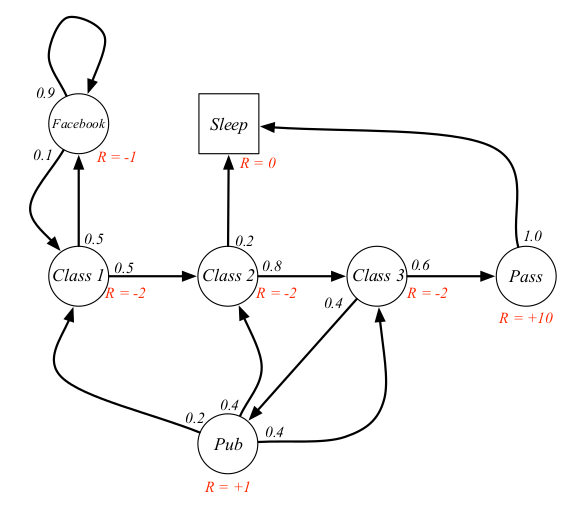

In [122]:
class MRP:
    def __init__(self,gamma=1):
        self.states=["c1","c2","c3","pass","pub","fb","sleep"]
        self.start=["c1"]
        self.terminal=["sleep"]
        self.current=random.choice(self.start)
        
        self.R=pd.Series(np.array([-2,-2,-2,10,1,-1,0]), index=self.states)
        self.V=pd.Series(np.array([0,0,0,0,0,0,0]), index=self.states)
        self.gamma=gamma
        self.G=0
        self.t=1
        
        self.P=pd.DataFrame(np.array([[0,0.5,0,0,0,0.5,0],
                [0,0,0.8,0,0,0,0.2],
                [0,0,0,0.6,0.4,0,0],
                [0,0,0,0,0,0,1.0],
                [0.2,0.4,0.4,0,0,0,0],
                [0.1,0,0,0,0,0.9,0],
                [0,0,0,0,0,0,1.0]]),
                index=self.states, columns=self.states)            
        
    def transition(self):       
        cdf = self.P.loc[self.current].cumsum()        
        state = (cdf>=random.random()).idxmax()                     #While exiting from current state        
        self.t=self.t+1                                              #Increase the step count
        self.G=self.G+pow(self.gamma,self.t-2)*self.R[self.current]  #Calculate total reward
        print("{:5} | {:6} | {:8}".format(self.current, self.R[self.current], pow(self.gamma,self.t-2)))    
        self.current=state          
        
    def total_reward(self):
        return self.G
    
    def calc_state_value(self, itr=10, inv=False):        
        if inv:
            invmat =  np.linalg.inv(np.identity(self.V.shape[-1])-self.gamma*self.P)
            self.V = np.matmul(invmat,self.R)
        else:        
            for i in range(itr):
                self.V = self.R + self.gamma*np.matmul(self.P,self.V)        

    def reset(self):
        self.current=random.choice(self.start)
        self.G=0
        self.t=1

## Sample Episodes for Student Markov Reward Process

In [123]:
print("Welcome To Student Markov Process Simulator!")
print()
n = int(input("Enter no. of random walks: "))
    
studmrp = MRP(0.5)

for i in range(n):
    print("RW {}:".format(i+1))
    chainwalk=""
    studmrp.reset()
    print("State | Reward | Discount")
    while(studmrp.current not in studmrp.terminal):
        chainwalk=chainwalk+"->"+studmrp.current
        studmrp.transition()
    chainwalk=chainwalk+"->"+studmrp.current
    trew=studmrp.total_reward()
    print(chainwalk)
    print("You earned: {} points!".format(trew))
    print(" ")

Welcome To Student Markov Process Simulator!

Enter no. of random walks: 5
RW 1:
State | Reward | Discount
c1    |     -2 |      1.0
fb    |     -1 |      0.5
fb    |     -1 |     0.25
c1    |     -2 |    0.125
fb    |     -1 |   0.0625
fb    |     -1 |  0.03125
fb    |     -1 | 0.015625
fb    |     -1 | 0.0078125
fb    |     -1 | 0.00390625
fb    |     -1 | 0.001953125
c1    |     -2 | 0.0009765625
fb    |     -1 | 0.00048828125
fb    |     -1 | 0.000244140625
fb    |     -1 | 0.0001220703125
fb    |     -1 | 6.103515625e-05
fb    |     -1 | 3.0517578125e-05
fb    |     -1 | 1.52587890625e-05
c1    |     -2 | 7.62939453125e-06
c2    |     -2 | 3.814697265625e-06
c3    |     -2 | 1.9073486328125e-06
pass  |     10 | 9.5367431640625e-07
->c1->fb->fb->c1->fb->fb->fb->fb->fb->fb->c1->fb->fb->fb->fb->fb->fb->c1->c2->c3->pass->sleep
You earned: -3.125978469848633 points!
 
RW 2:
State | Reward | Discount
c1    |     -2 |      1.0
c2    |     -2 |      0.5
c3    |     -2 |     0.25
pass  |  

## Computing State Value Function V(s)

In [124]:
gamma=0
studmrp = MRP(gamma)
studmrp.calc_state_value(inv=True)
print("State | Value | Gamma = {}".format(gamma))
print("-------------")
for i in range(len(studmrp.V)):
    print("{:5} | {:5}".format(studmrp.states[i], studmrp.V[i]))

State | Value | Gamma = 0
-------------
c1    |  -2.0
c2    |  -2.0
c3    |  -2.0
pass  |  10.0
pub   |   1.0
fb    |  -1.0
sleep |   0.0


In [125]:
gamma=0.9
studmrp = MRP(gamma)
studmrp.calc_state_value(inv=True)
print("State | Value | Gamma = {}".format(gamma))
print("-------------")
for i in range(len(studmrp.V)):
    print("{:5} | {:5}".format(studmrp.states[i], studmrp.V[i]))

State | Value | Gamma = 0.9
-------------
c1    | -5.012728910014523
c2    | 0.9426552976939075
c3    | 4.087021246797094
pass  |  10.0
pub   | 1.9083923522141462
fb    | -7.637608431059514
sleep |   0.0


In [126]:
gamma=0.9
studmrp = MRP(gamma)
studmrp.calc_state_value(itr=100)
print("State | Value | Gamma = {}".format(gamma))
print("-------------")
for i in range(len(studmrp.V)):
    print("{:5} | {:5}".format(studmrp.states[i], studmrp.V[i]))

State | Value | Gamma = 0.9
-------------
c1    | -5.012727855225977
c2    | 0.9426554118409229
c3    | 4.087021383127378
pass  |  10.0
pub   | 1.9083926778634264
fb    | -7.637606529565592
sleep |   0.0


In [127]:
gamma=1
studmrp = MRP(gamma)
studmrp.calc_state_value(inv=True)
print("State | Value | Gamma = {}".format(gamma))
print("-------------")
for i in range(len(studmrp.V)):
    print("{:5} | {:5}".format(studmrp.states[i], studmrp.V[i]))

LinAlgError: Singular matrix

In [128]:
gamma=1
studmrp = MRP(gamma)
studmrp.calc_state_value(itr=100)
print("State | Value | Gamma = {}".format(gamma))
print("-------------")
for i in range(len(studmrp.V)):
    print("{:5} | {:5}".format(studmrp.states[i], studmrp.V[i]))

State | Value | Gamma = 1
-------------
c1    | -12.418287702397645
c2    | 1.4703089405374907
c3    | 4.3371337110593915
pass  |  10.0
pub   | 0.8410368812854548
fb    | -22.318009521720207
sleep |   0.0


In [113]:
gamma=0.3
studmrp = MRP(gamma)
studmrp.calc_state_value(itr=100)
print("State | Value | Gamma = {}".format(gamma))
print("-------------")
for i in range(len(studmrp.V)):
    print("{:5} | {:5}".format(studmrp.states[i], studmrp.V[i]))

State | Value | Gamma = 0.3
-------------
c1    | -2.5257034311775595
c2    | -2.0310304960668444
c3    | -0.1292937336118516
pass  |  10.0
pub   | 0.5892188865679029
fb    | -1.4736590451168858
sleep |   0.0


# Markov Decision Process simulation on a sample student state space

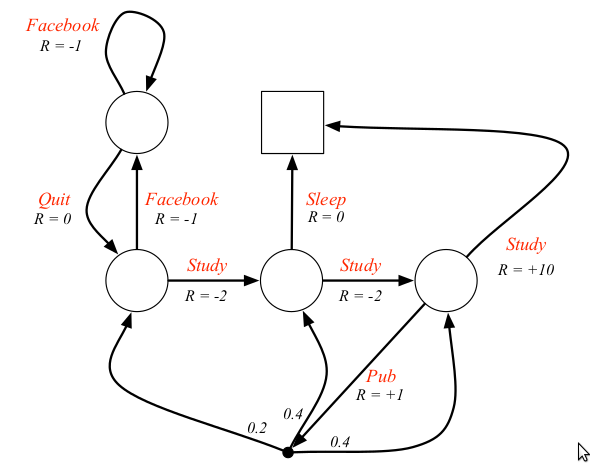

In [154]:
import numpy as np
import pandas as pd
import random
import math
from matplotlib import pyplot as plt
from statistics import mean 

class MDP:
    def __init__(self,gamma=1):
        self.states = ["c1","c2","c3","fb","sleep"]
        self.actions = ["study", "fb", "quit", "pub", "sleep"]
        self.start = ["c1"]
        self.terminal = ["sleep"]
        self.current = np.random.choice(self.start)      
        
        self.R = []
        self.A2R = pd.DataFrame(np.array([[-2,-2,10,0,0],
                  [-1,0,0,-1,0],
                  [0,0,0,0,0],
                  [0,0,1,0,0],
                  [0,0,0,0,0]]),
                  index = self.actions, columns = self.states)
        
        self.V=pd.Series(np.array([0,0,0,0,0]), index = self.states)
        self.gamma=gamma
        self.G=0
        self.t=1
        
        self.P=[]        
        self.S2A=pd.DataFrame(np.array([[0.5,0.5,0,0,0],
                  [0.5,0,0,0,0.5],
                  [0.5,0,0,0.5,0],
                  [0,0.5,0.5,0,0],
                  [0,0,0,0,0]]),
                  index = self.states, columns = self.actions)
        #self.A2S= pd.Panel(
        self.A2S=np.array([
                  [[0,1,0,0,0],
                  [0,0,0,1,0],
                  [0,0,0,0,0],
                  [0,0,0,0,0],
                  [0,0,0,0,0]],
                  [[0,0,1,0,0],
                  [0,0,0,0,0],
                  [0,0,0,0,0],
                  [0,0,0,0,0],
                  [0,0,0,0,1]],
                  [[0,0,0,0,1],
                  [0,0,0,0,0],
                  [0,0,0,0,0],
                  [0.2,0.4,0.4,0,0],
                  [0,0,0,0,0]],
                  [[0,0,0,0,0],
                  [0,0,0,1,0],
                  [1,0,0,0,0],
                  [0,0,0,0,0],
                  [0,0,0,0,0]],
                  [[0,0,0,0,0],
                  [0,0,0,0,0],
                  [0,0,0,0,0],
                  [0,0,0,0,0],
                  [0,0,0,0,0]],
                 ]) 
            #), items = self.states, major_axis = self.actions, minor_axis = self.states)
        
        
        self.calc_Rpi()
        self.calc_Ppi()
        
    def calc_Rpi(self):
        rpi = np.matmul(self.S2A, self.A2R)
        self.R = pd.Series(np.diag(rpi), index = self.states)
        print("Reward Function for the given policy i.e. Rpi: ")
        print(self.R)
        
    def calc_Ppi(self):
        ppi = []
        for i in range(len(self.states)):
            pa2s = np.matmul(self.S2A, self.A2S[i])
            pa2s = np.diag(pa2s)
            if np.size(ppi)==0:
                ppi = np.append(ppi,pa2s)
            else:
                ppi = np.vstack((ppi,pa2s))
            
        self.P = pd.DataFrame(ppi, index = self.states, columns = self.states)
        print("Transition Probability for the given policy i.e. Ppi: ")
        print(self.P)
        
        
    def transition(self):       
        cdf = self.P.loc[self.current].cumsum()        
        state = (cdf>=random.random()).idxmax()                     #While exiting from current state        
        self.t=self.t+1                                              #Increase the step count
        self.G=self.G+pow(self.gamma,self.t-2)*self.R[self.current]  #Calculate total reward
        print("{:5} | {:6} | {:8}".format(self.current, self.R[self.current], pow(self.gamma,self.t-2)))    
        self.current=state          
        
    def total_reward(self):
        return self.G
    
    def calc_state_value(self, itr=10, inv=False):        
        if inv:
            invmat =  np.linalg.inv(np.identity(self.V.shape[-1])-self.gamma*self.P)
            self.V = np.matmul(invmat,self.R)
        else:        
            for i in range(itr):
                self.V = self.R + self.gamma*np.matmul(self.P,self.V)        

    def reset(self):
        self.current=random.choice(self.start)
        self.G=0
        self.t=1

In [155]:
studmdp = MDP(1)

Reward Function for the given policy i.e. Rpi: 
c1      -1.5
c2      -1.0
c3       5.5
fb      -0.5
sleep    0.0
dtype: float64
Transition Probability for the given policy i.e. Ppi: 
        c1   c2   c3   fb  sleep
c1     0.0  0.5  0.0  0.5    0.0
c2     0.0  0.0  0.5  0.0    0.0
c3     0.0  0.0  0.2  0.0    0.0
fb     0.0  0.0  0.0  0.5    0.0
sleep  0.0  0.0  0.0  0.0    0.0


In [156]:
studmdp.S2A

,study,fb,quit,pub,sleep
c1,0.5,0.5,0.0,0.0,0.0
c2,0.5,0.0,0.0,0.0,0.5
c3,0.5,0.0,0.0,0.5,0.0
fb,0.0,0.5,0.5,0.0,0.0
sleep,0.0,0.0,0.0,0.0,0.0


In [144]:
studmdp.A2R

,c1,c2,c3,fb,sleep
study,-2,-2,10,0,0
fb,-1,0,0,-1,0
quit,0,0,0,0,0
pub,0,0,1,0,0
sleep,0,0,0,0,0
